In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import f1_score

In [2]:
# Load and preprocess data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [3]:
# Model factory function
def create_model():
    return Sequential([
        Input(shape=(28, 28)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])

In [4]:
# Optimizers for Part II
optimizers_part2 = {
    "SGD (GD)": lambda: tf.keras.optimizers.SGD(learning_rate=0.01),
    "SGD + Momentum": lambda: tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    "SGD + Nesterov": lambda: tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
}

results_part2 = {}

In [5]:
# Train models using each optimizer
for name, get_optimizer in optimizers_part2.items():
    print(f"Training with {name}...")
    model = create_model()
    model.compile(optimizer=get_optimizer(), loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(x_train, y_train_cat, epochs=10, batch_size=64, verbose=0, validation_split=0.1)

    # Evaluate
    loss, acc = model.evaluate(x_test, y_test_cat, verbose=0)
    y_pred = np.argmax(model.predict(x_test, verbose=0), axis=1)
    f1 = f1_score(y_test, y_pred, average='weighted')

    results_part2[name] = {
        "accuracy": acc,
        "f1_score": f1,
        "history": history.history
    }

Training with SGD (GD)...
Training with SGD + Momentum...
Training with SGD + Nesterov...


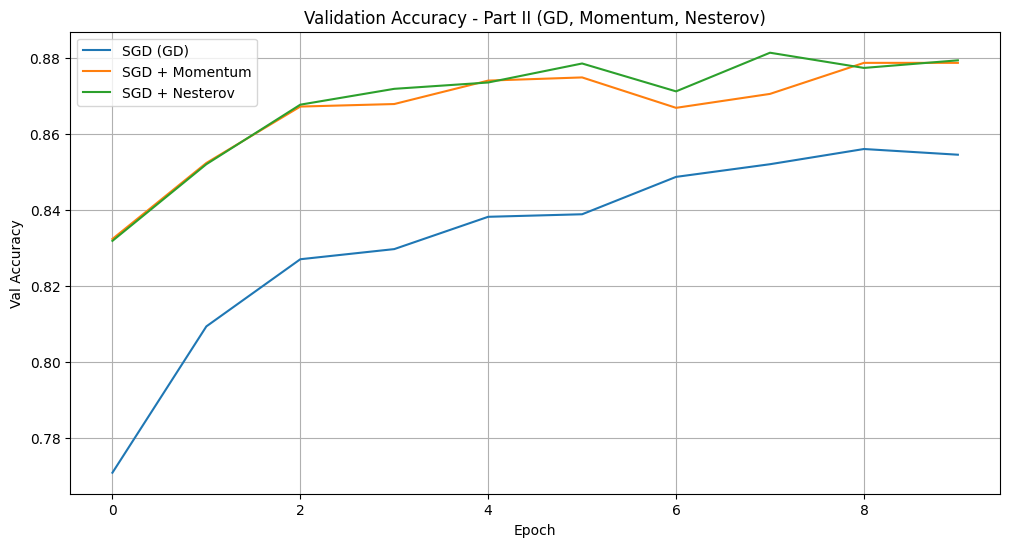

In [6]:
# Visualization - Validation Accuracy
plt.figure(figsize=(12, 6))
for name, res in results_part2.items():
    plt.plot(res['history']['val_accuracy'], label=f"{name}")
plt.title("Validation Accuracy - Part II (GD, Momentum, Nesterov)")
plt.xlabel("Epoch")
plt.ylabel("Val Accuracy")
plt.legend()
plt.grid(True)
plt.show()

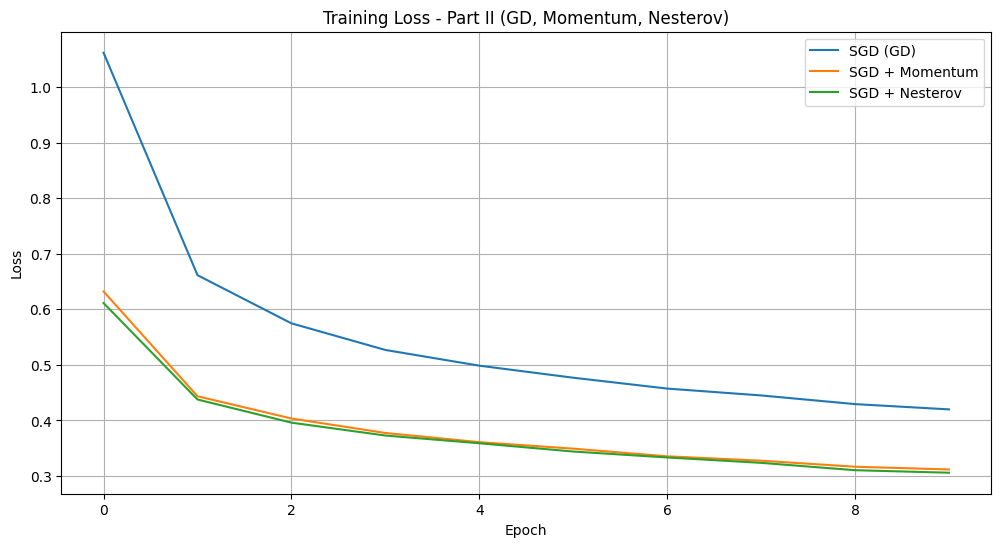

In [7]:
# Visualization - Training Loss
plt.figure(figsize=(12, 6))
for name, res in results_part2.items():
    plt.plot(res['history']['loss'], label=f"{name}")
plt.title("Training Loss - Part II (GD, Momentum, Nesterov)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Final performance table
print("\nFinal Results - Part II (GD Variants):")
for name, res in results_part2.items():
    print(f"{name:18} - Accuracy: {res['accuracy']:.4f}, F1 Score: {res['f1_score']:.4f}")


Final Results - Part II (GD Variants):
SGD (GD)           - Accuracy: 0.8471, F1 Score: 0.8472
SGD + Momentum     - Accuracy: 0.8715, F1 Score: 0.8718
SGD + Nesterov     - Accuracy: 0.8746, F1 Score: 0.8738


## Part II: Optimizer Analysis - SGD Variants

In Part II, we evaluated three gradient descent variants (**Vanilla SGD**, **SGD + Momentum**, and **SGD + Nesterov**) using an identical neural network architecture and training configuration.

### Final Performance Summary
| Optimizer         | Accuracy | F1 Score  |
|-------------------|----------|-----------|
| SGD (GD)          | 0.8471   | 0.8472    |
| SGD + Momentum    | 0.8715   | 0.8718    |
| SGD + Nesterov    | 0.8746   | 0.8738    |

---

### Key Observations

1. **Momentum-Driven Improvements**  
   - Adding momentum boosted accuracy by **2.44%** (0.8471 → 0.8715) over vanilla SGD  
   - Momentum mechanisms:  
     - Reduce oscillations in parameter updates  
     - Accelerate convergence in consistent gradient directions  

2. **Nesterov's Edge**  
   - Nesterov acceleration slightly outperformed standard momentum (0.8715 → 0.8746 accuracy)  
   - Achieved **0.31% accuracy gain** through:  
     - "Look-ahead" gradient calculation at projected parameter positions  
     - More stable convergence trajectories  

3. **Vanilla SGD Limitations**  
   - Baseline SGD showed weakest performance due to:  
     - No historical gradient memory  
     - Sensitivity to noisy updates  
     - Poor navigation of high-curvature loss landscapes  

4. **Metric Consistency**  
   - All variants maintained near-identical accuracy and F1 scores (<0.001 gap)  
   - Indicates balanced precision-recall tradeoffs across classes  

---

### Conclusion

1. **Nesterov Superiority**  
   SGD + Nesterov achieved peak performance (87.46% accuracy), validating its theoretical advantages in convex/non-convex optimization.

2. **Momentum Necessity**  
   Both momentum variants outperformed vanilla SGD by **>2.4%**, proving gradient history utilization is critical for modern deep learning.

3. **Practical Guidance**  
   - Always prefer momentum-enhanced SGD over vanilla implementations  
   - Default to Nesterov acceleration for marginal but consistent gains  
   - Reserve vanilla SGD only for simple convex problems  

4. **Future Directions**  
   - Combine momentum with adaptive learning rates (e.g., Adam)  
   - Explore momentum scheduling strategies  
   - Test performance on deeper architectures with skip connections  